In [535]:
import numpy as np
import cmath
import maxwell1D as max1d
import matplotlib.pyplot as plt
import FFT_2D as f2d
import math
import operator

In [536]:
N = 2048#512
CFL = 0.5
avg_num = 1000
omegas = np.linspace(- math.pi/CFL,math.pi/CFL)
ks = np.linspace(- math.pi,math.pi)
tsteps = N

In [537]:
Ei,Hi = max1d.initial_whitenoise(N)

In [538]:
E_avgi,H_avgi = max1d.initial_whitenoise(N)
for i in range(avg_num):
    En , Hn = max1d.initial_whitenoise(N)
    E_avgi = E_avgi +En
    H_avgi = H_avgi +Hn
E_avgi = np.divide(E_avgi,avg_num)
H_avgi = np.divide(H_avgi,avg_num)
    

In [539]:
E,H = max1d.save_steps1D(tsteps,Ei,Hi,CFL)
E_avg,H_avg = max1d.save_steps1D(tsteps,E_avgi,H_avgi,CFL)

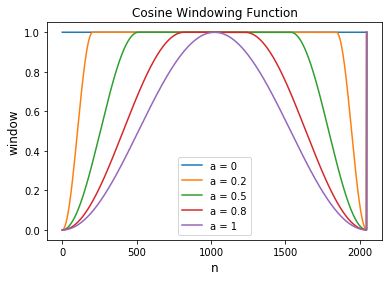

In [540]:
E_wind = f2d.fft_window(E_avg,0.5,N)

a = [0,.2,.5,.8,1]
for i in range(len(a)):
    plt.plot(f2d.turkey_window(N,a[i]),label = "a = " + str(a[i]))
plt.legend()
plt.xlabel('n',size = 12)
plt.ylabel('window',size = 12)
plt.title('Cosine Windowing Function')
plt.show()

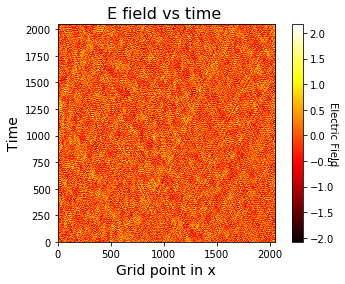

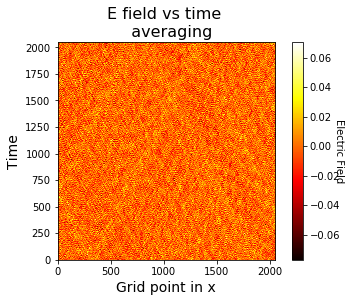

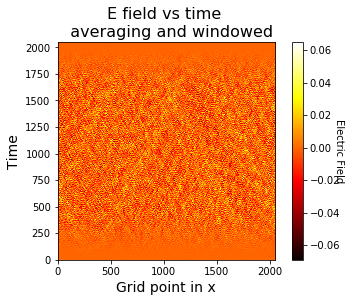

In [541]:
plt.imshow(E,cmap='hot',origin='lower')
plt.title("E field vs time " ,size = 16)
plt.ylabel('Time',size = 14)
plt.xlabel('Grid point in x', size = 14)
cbar = plt.colorbar()
cbar.set_label('Electric Field', rotation=270)
plt.show()

plt.imshow(E_avg,cmap='hot',origin='lower')
plt.title("E field vs time " +'\n' +'  averaging',size = 16)
plt.ylabel('Time',size = 14)
plt.xlabel('Grid point in x', size = 14)
cbar = plt.colorbar()
cbar.set_label('Electric Field', rotation=270)
plt.show()

plt.imshow(E_wind,cmap='hot',origin='lower')
plt.title("E field vs time " +'\n' +'  averaging and windowed',size = 16)
plt.ylabel('Time',size = 14)
plt.xlabel('Grid point in x', size = 14)
cbar = plt.colorbar()
cbar.set_label('Electric Field', rotation=270)
plt.show()

In [542]:
E_f = f2d.fft2D(E)
E_favg = f2d.fft2D(E_avg)
E_fwind = f2d.fft2D(E_wind)

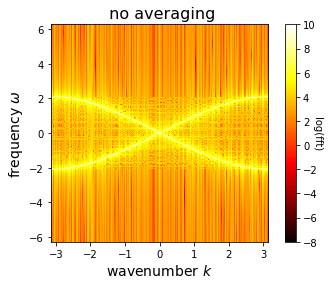

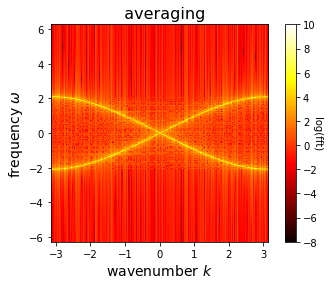

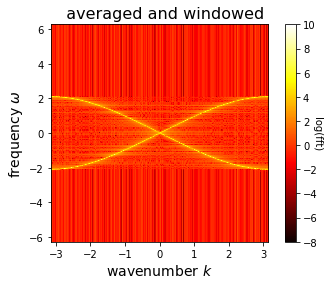

In [543]:
plt.imshow(np.log(np.abs(E_f)),cmap='hot',origin='lower', extent=[-math.pi,math.pi,-math.pi/CFL,math.pi/CFL],aspect = 0.5)
plt.ylabel('frequency $\omega$',size = 14)
plt.title(' no averaging',size = 16)
plt.xlabel('wavenumber $k$', size = 14)
cbar = plt.colorbar()
plt.clim(-8,10)
cbar.set_label('log(fft)', rotation=270)
plt.show()

plt.imshow(np.log(np.abs(E_favg)),cmap='hot',origin='lower', extent=[-math.pi,math.pi,-math.pi/CFL,math.pi/CFL],aspect = 0.5)
plt.title('  averaging',size = 16)
plt.ylabel('frequency $\omega$',size = 14)
plt.xlabel('wavenumber $k$', size = 14)
cbar = plt.colorbar()
plt.clim(-8,10)
cbar.set_label('log(fft)', rotation=270)
plt.show()

plt.imshow(np.log(np.abs(E_fwind)),cmap='hot',origin='lower', extent=[-math.pi,math.pi,-math.pi/CFL,math.pi/CFL],aspect = 0.5)
plt.title('  averaged and windowed',size = 16)
plt.ylabel('frequency $\omega$',size = 14)
plt.xlabel('wavenumber $k$', size = 14)
cbar = plt.colorbar()
plt.clim(-8,10)
cbar.set_label('log(fft)', rotation=270)
plt.show()

In [544]:
n = N
n2= int(N/2)
def calc_wavenum(N,E):
    N2= int(N/2)
    omegas=np.linspace(0,2*math.pi,N2)
    omega=[]
    val=[]
    knumber = np.linspace(0,math.pi,N2)
    my_list = np.transpose(np.log(E[N2:N,n2:n]))
    for i in range(N2):
        index, value = max(enumerate(my_list[i]), key=operator.itemgetter(1))
        omega.append(omegas[index])
    return(knumber,omega)

In [545]:
knumber,omega1 = calc_wavenum(tsteps,E_f)
knumber,omega2 = calc_wavenum(tsteps,E_favg)
knumber,omega3 = calc_wavenum(tsteps,E_fwind)

def yee(k0,CFL):
    yee=[]
    for i in range(len(k0)):
        yee.append(2.0/CFL*cmath.asin( CFL* cmath.sin(k0[i]/2.0)))
    return(yee)

yeek = yee(knumber,CFL)

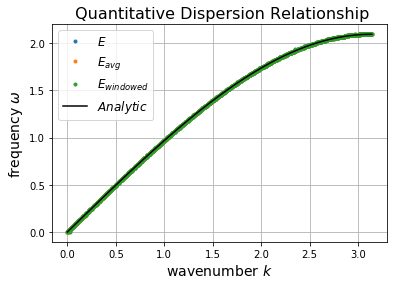

In [546]:
plt.plot(knumber,omega1,'.',label= '$E$')
plt.plot(knumber,omega2,'.',label= '$E_{avg}$')
plt.plot(knumber,omega3,'.',label= '$E_{windowed}$')
plt.plot(knumber,yeek,'-',c = 'black',label= '$Analytic$')
plt.title(' Quantitative Dispersion Relationship',size = 16)
plt.ylabel('frequency $\omega$',size = 14)
plt.xlabel('wavenumber $k$', size = 14)
plt.legend(frameon=True,fontsize = 12)
plt.grid(True)
#plt.xlim(2.59,3.14)
#plt.ylim(2,2.1)
plt.show()

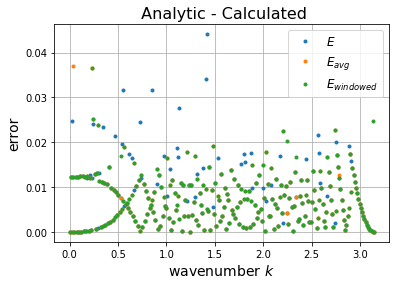

In [502]:
plt.plot(knumber,np.abs(np.subtract(yeek,omega1)),'.',label= '$E$')
plt.plot(knumber,np.abs(np.subtract(yeek,omega2)),'.',label= '$E_{avg}$')
plt.plot(knumber,np.abs(np.subtract(yeek,omega3)),'.',label= '$E_{windowed}$')
plt.title(' Analytic - Calculated',size = 16)
plt.ylabel('error',size = 14)
plt.xlabel('wavenumber $k$', size = 14)
plt.legend(frameon=True,fontsize = 12)
plt.grid(True)
#plt.ylim(0,0.01)
plt.show()

In [503]:
m1=np.mean(np.abs(np.subtract(yeek,omega1)))
m2=np.mean(np.abs(np.subtract(yeek,omega2)))
m3 =np.mean(np.abs(np.subtract(yeek,omega3)))

s1=np.std(np.abs(np.subtract(yeek,omega1)))
s2=np.std(np.abs(np.subtract(yeek,omega2)))
s3 =np.std(np.abs(np.subtract(yeek,omega3)))

In [504]:
print(m1,m2,m3)

0.007953759809064063 0.00714591833323284 0.0072775264360042825


In [505]:
print(s1,s2,s3)

0.00669643181765334 0.00574895374340295 0.00565969895479403


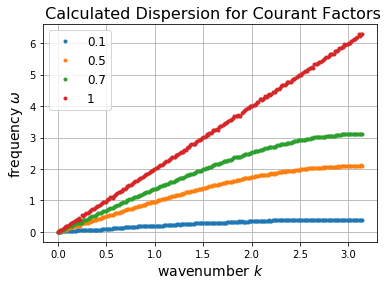

In [506]:
for cfl in [0.1,0.5,0.7,1]:
    E_avg,H_avg = max1d.save_steps1D(tsteps,E_avgi,H_avgi,cfl)
    E_wind = f2d.fft_window(E_avg,0.5,N)
    E_fwind = f2d.fft2D(E_wind)
    knumber,omega = calc_wavenum(tsteps,E_fwind)
    plt.plot(knumber,omega,'.',label= str(cfl))
plt.title(' Calculated Dispersion for Courant Factors',size = 16)
plt.ylabel('frequency $\omega$',size = 14)
plt.xlabel('wavenumber $k$', size = 14)
plt.legend(frameon=True,fontsize = 12)
plt.grid(True)
#plt.xlim(2.59,3.14)
#plt.ylim(2,2.1)
plt.show()

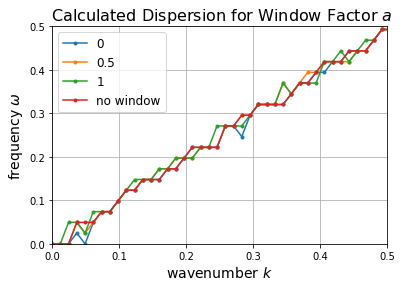

In [525]:
for a in [0,.5, 1]:
    E_avg,H_avg = max1d.save_steps1D(tsteps,Ei,Hi,CFL)
    E_wind = f2d.fft_window(E_avg,0.5,N)
    E_wind = f2d.fft_window(np.transpose(E_wind),a,N)
    E_fwind = f2d.fft2D(np.transpose(E_wind))
    knumber,omega = calc_wavenum(tsteps,E_fwind)
    plt.plot(knumber,omega,'.-',label= str(a))
plt.plot(knumber,omega1,'.-',label= 'no window')
plt.title(' Calculated Dispersion for Window Factor $a$',size = 16)
plt.ylabel('frequency $\omega$',size = 14)
plt.xlabel('wavenumber $k$', size = 14)
plt.legend(frameon=True,fontsize = 12)
plt.grid(True)
plt.xlim(0,0.5)
plt.ylim(0,.5)
plt.show()

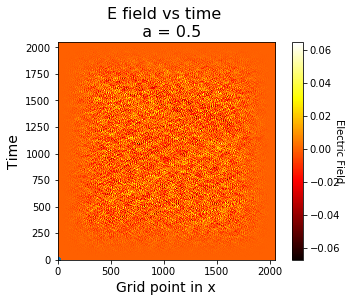

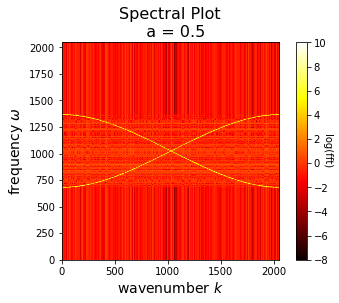

In [548]:
a = 0.5
E_avg,H_avg = max1d.save_steps1D(tsteps,E_avgi,H_avgi,CFL)
E_wind = f2d.fft_window(E_avg,a,N)
E_wind = f2d.fft_window(np.transpose(E_wind),a,N)
E_fwind = f2d.fft2D(E_wind)
knumber,omega = calc_wavenum(tsteps,E_fwind)
plt.plot(knumber,omega,'.-',label= str(a))

plt.imshow(E_wind,cmap='hot',origin='lower')
plt.title("E field vs time " +'\n' +'  a = ' +str(a),size = 16)
plt.ylabel('Time',size = 14)
plt.xlabel('Grid point in x', size = 14)
cbar = plt.colorbar()
cbar.set_label('Electric Field', rotation=270)
plt.show()

plt.imshow(np.log(np.abs(np.transpose(E_fwind))),cmap='hot',origin='lower')
plt.title("Spectral Plot" +'\n' +'  a = ' +str(a),size = 16)
plt.ylabel('frequency $\omega$',size = 14)
plt.xlabel('wavenumber $k$', size = 14)
cbar = plt.colorbar()
plt.clim(-8,10)
cbar.set_label('log(fft)', rotation=270)
plt.show()